In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna

In [2]:
df = pd.read_csv('diabetes.csv')

df.columns = [col.lower() for col in df.columns]

In [3]:
X = df.iloc[:,:-1]
y = df[['outcome']]

In [4]:
X.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y.head()

,outcome
0,1
1,0
2,1
3,0
4,1


In [4]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=42)

In [5]:
xgb = XGBClassifier(n_jobs=-1,random_state=42)
lgbm = LGBMClassifier(n_jobs=-1,random_state=42)

In [6]:
xgb.fit(X_train,y_train)
lgbm.fit(X_train,y_train)

C:\Users\qhadk\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\qhadk\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LGBMClassifier(random_state=42)

In [7]:
y_pred1 = xgb.predict(X_test)
y_pred2 = lgbm.predict(X_test)

accuracy1 = accuracy_score(y_test,y_pred1)
accuracy2 = accuracy_score(y_test,y_pred2)

In [8]:
accuracy1,accuracy2

(0.7597402597402597, 0.7207792207792207)

### 의사 결정 트리 시각화

In [9]:
%matplotlib inline

import os

from xgboost import plot_tree as xgb_tree
from lightgbm import plot_tree as lgbm_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100,200

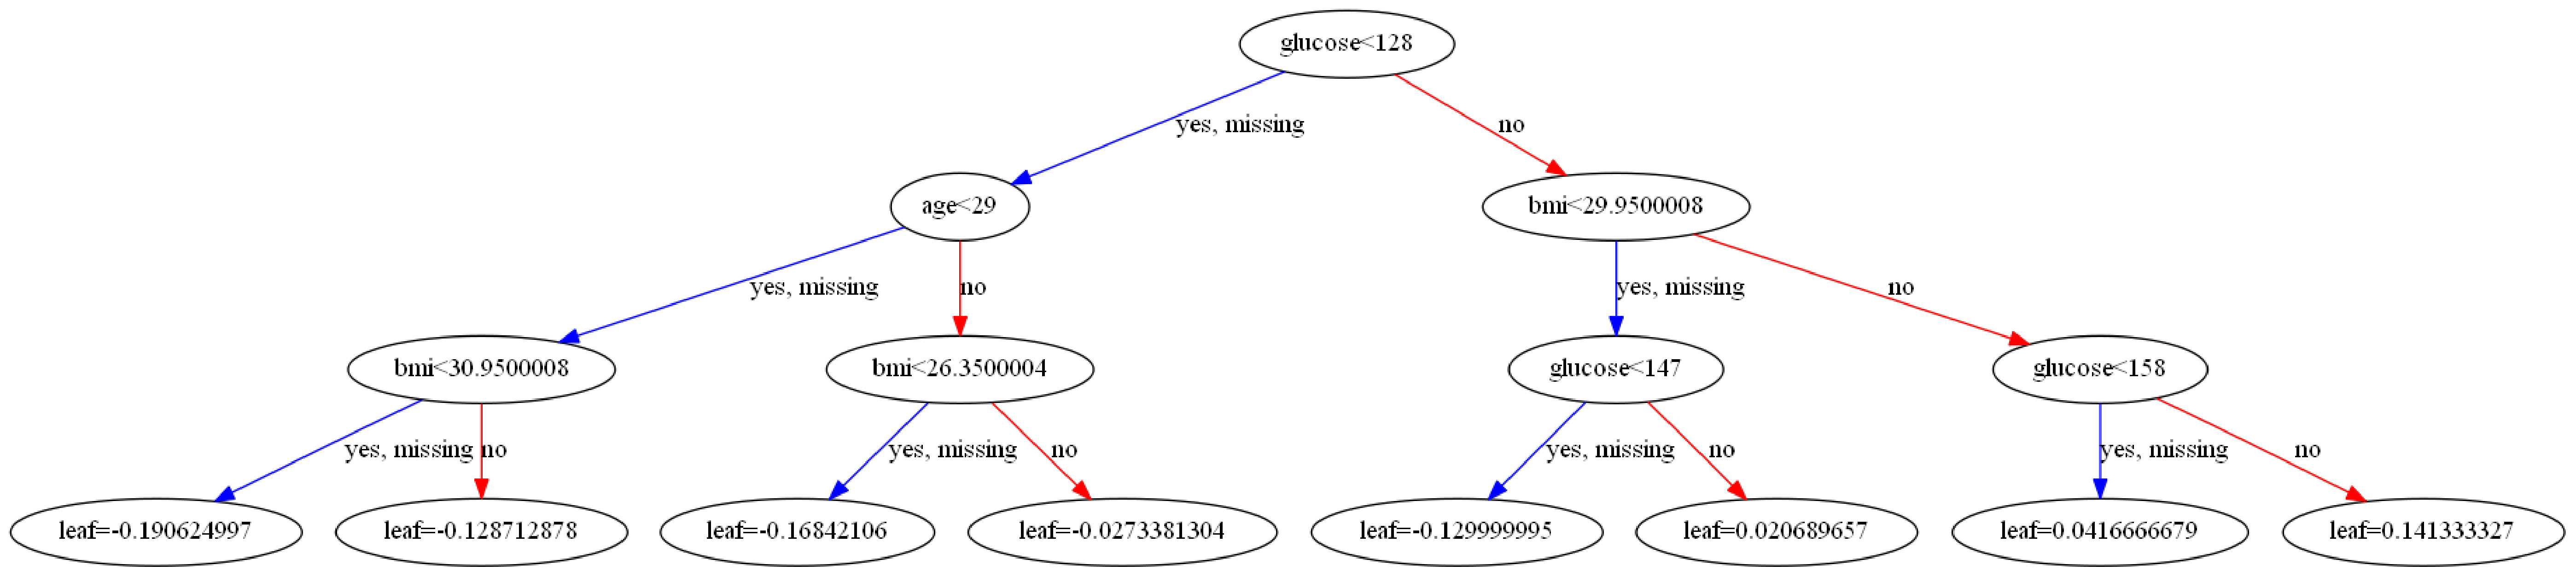

In [10]:
xgb_tree(xgb)

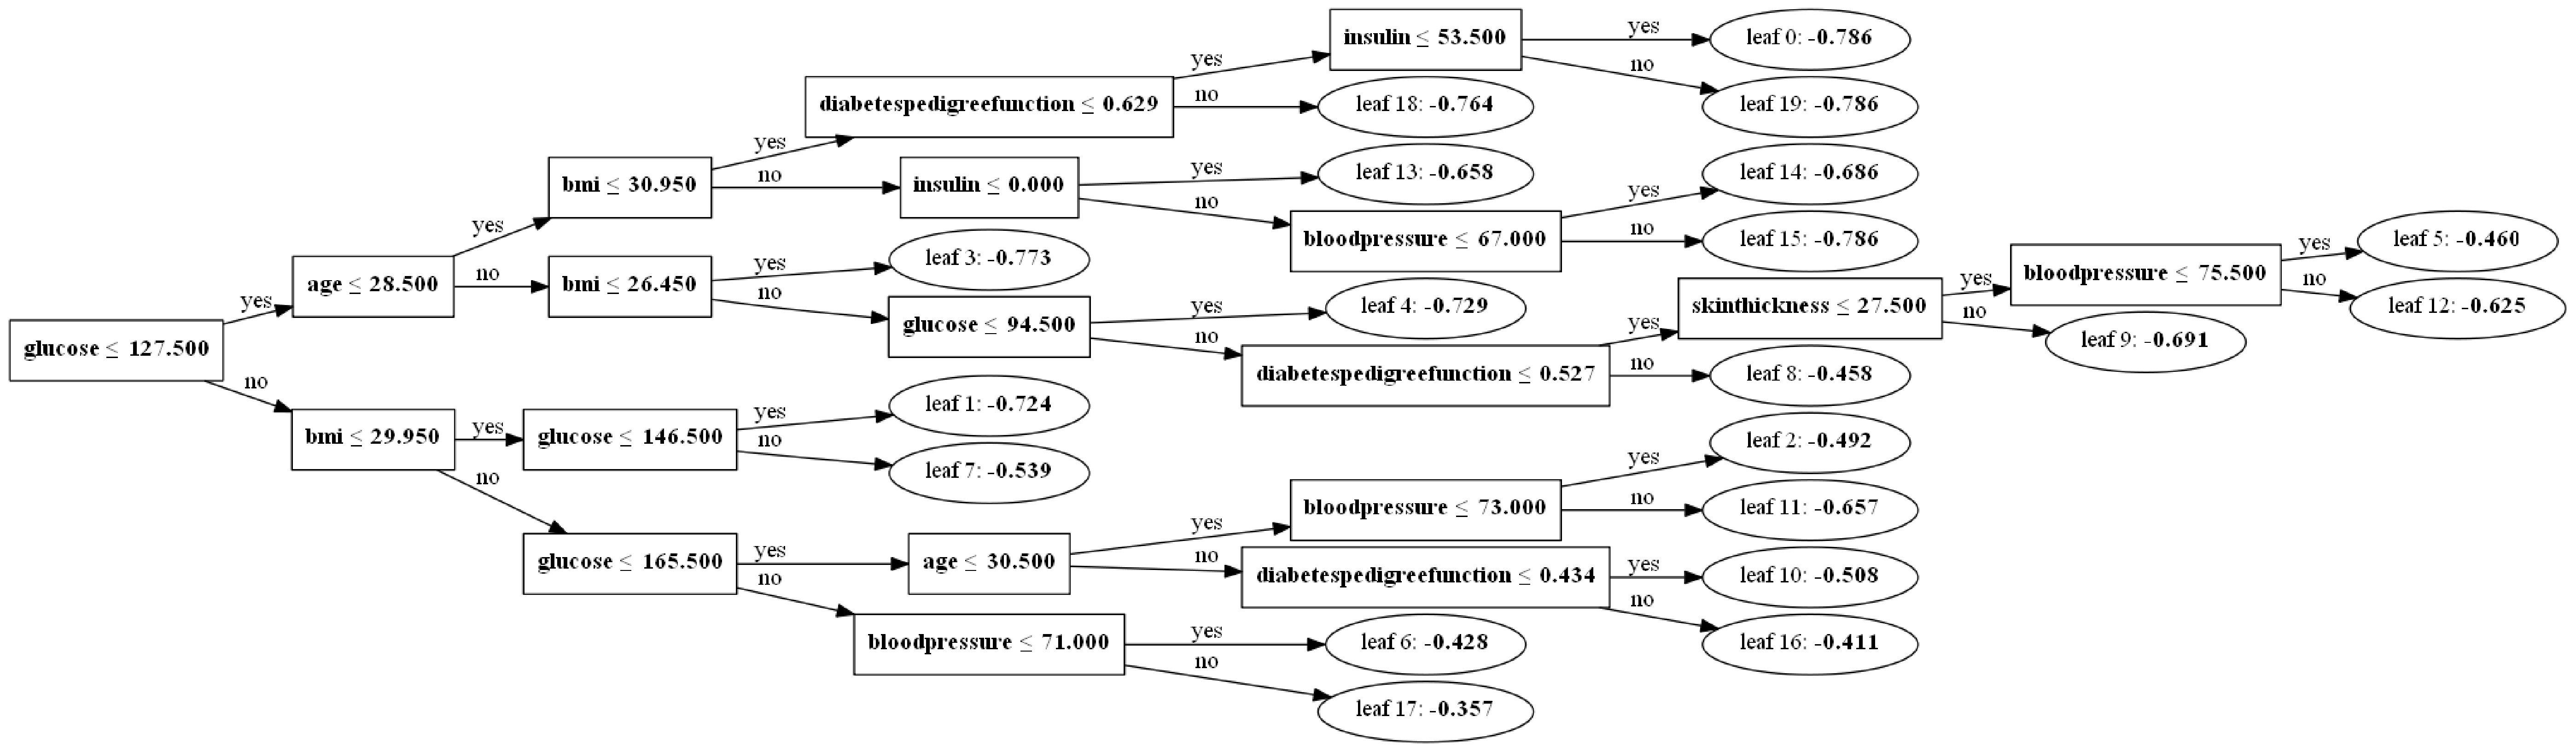

In [15]:
lgbm_tree(lgbm)

In [11]:
from xgboost import plot_importance as xgb_importance
from lightgbm import plot_importance as lgbm_importance

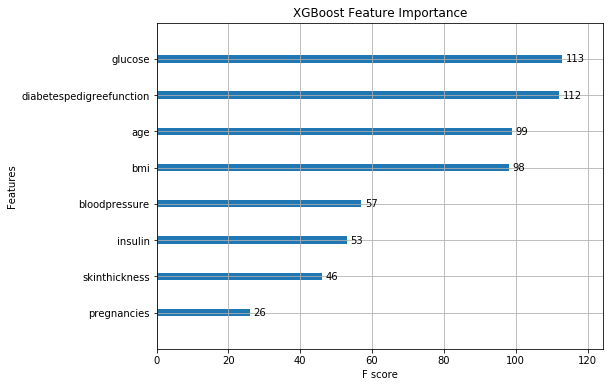

In [12]:
rcParams['figure.figsize'] = 8,6
xgb_importance(xgb)
plt.title("XGBoost Feature Importance")
plt.show()

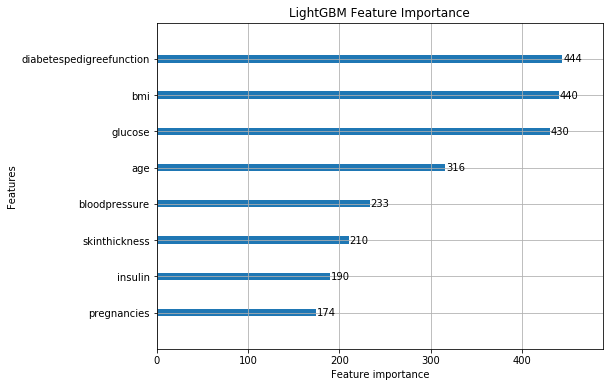

In [13]:
lgbm_importance(lgbm)
plt.title("LightGBM Feature Importance")
plt.show()

### 부분의존성플롯

- 학습 데이터를 철저하게 분석해서 모델이 어떻게 학습할 것인지 예상하는 XAI 기법
- 부분 의존성 기법은 데이터를 분석하는데 pdpbox 패키지를 이용하면 손쉽고 효율적인 모델을 해석

In [14]:
from pdpbox import info_plots

In [15]:
cols = df.columns[:-1]
target = df.columns[-1]

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


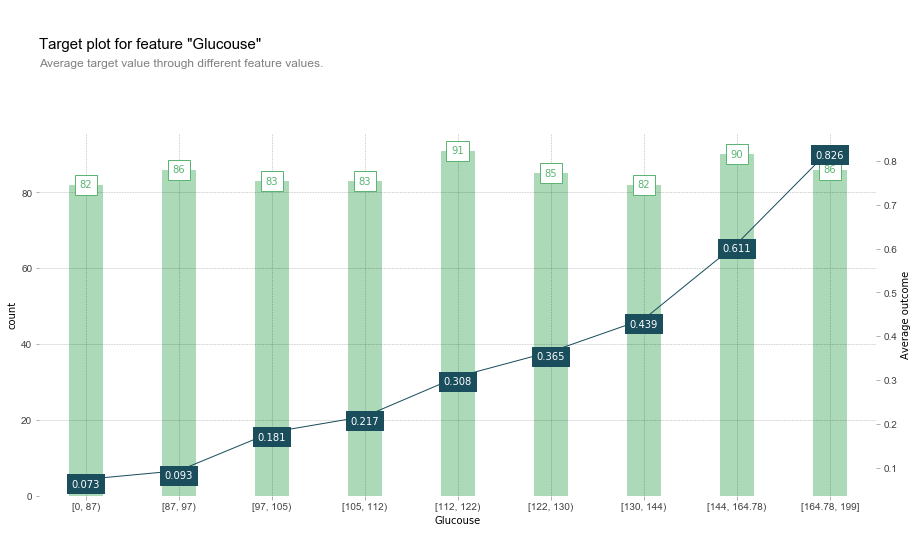

In [16]:
fig,ax,summary_df = info_plots.target_plot(df=df,
                                          feature='glucose',feature_name='Glucouse',target=target)
plt.show()

- X축은 Glucouse(GTT) 수치, 왼쪽 y축은 각 수치 구간별 데이터 개수 , 오른쪽 y축은 당뇨병 진단 여부(>50%)
- 막대는 왼쪽 y축, 꺾은선은 오른쪽 y축이다.
- 예를 들면 GTT가 84mg/dL인 경우 속한 그룹의 갯수는 82개고 당뇨에 걸릴 확률은 7.3%
- 반대로 181mg/dL인 환자는 당뇨에 걸릴 확률은 82.6%이다.

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


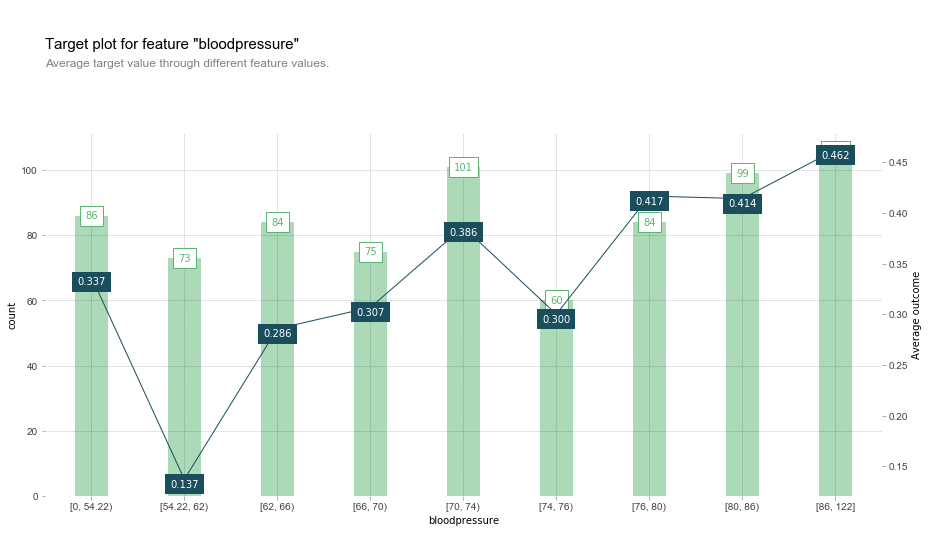

In [30]:
fig,ax,summary_df = info_plots.target_plot(df=df,
                                          feature=f'{df.columns[2]}',feature_name=f'{df.columns[2]}',target=target)
plt.show()

- 혈압이 122mmHg인 환자는 당뇨에 걸릴 확률이 46.2%로 제일 높게 나타나지만 가능성이 50%는 넘지 않는다.
- 따라서, 혈압 피처만으로 당뇨병을 진단하는 것은 섣부르다고 결론지을 수 있다.


In [31]:
summary_df

,x,display_column,value_lower,value_upper,count,outcome
0,0,"[0, 54.22)",0.000000,54.222222,86,0.337209
1,1,"[54.22, 62)",54.222222,62.000000,73,0.136986
2,2,"[62, 66)",62.000000,66.000000,84,0.285714
3,3,"[66, 70)",66.000000,70.000000,75,0.306667
4,4,"[70, 74)",70.000000,74.000000,101,0.386139
5,5,"[74, 76)",74.000000,76.000000,60,0.300000
6,6,"[76, 80)",76.000000,80.000000,84,0.416667
7,7,"[80, 86)",80.000000,86.000000,99,0.414141
8,8,"[86, 122]",86.000000,122.000000,106,0.462264


#### 예측 분포 플롯

- target_plot과의 차이점은 메서드의 파라미터로 우리가 학습한 모델이 들어간다는 점.
- 모델이 학습 데이터의 빈도와 비슷한 추이로 당뇨병을 진단하는가를 예측

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\pdpbox\info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction[:, 1]
C:\Users\qhadk\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj

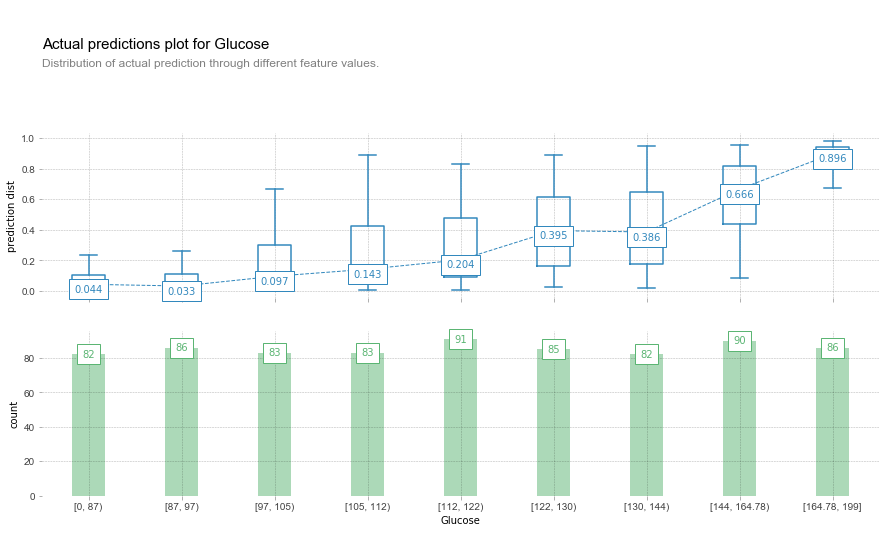

In [38]:
fig,ax,summary_df = info_plots.actual_plot(model = xgb,
                                          X = df[cols], feature=f'{df.columns[1]}',feature_name=f'{df.columns[1].capitalize()}',
                                          predict_kwds={})

- 0 ~ 87 사이에 있는 환자들은 평균 4.4%의 확률로 당뇨병을 앓고 있다고 추정
- 그리고 위에 모델을 사용하지 않고 학습 데이터의 분포만 표시한 플롯은 7.3%의 가능성으로 당뇨가 있다고 추정한다.
- 결국 ML 결과로 0-87mg/dL인 환자들은 데이터를 단순하게 사용했을 때보다 당뇨병의 존재 가능성이 상대적으로 더 낮아졌다.(4.4% <7.3%)
- 즉, 해당 구간의 GTT는 당뇨병을 진단하는데 음의 상관관계를 가진다.

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\pdpbox\info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction[:, 1]
C:\Users\qhadk\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj

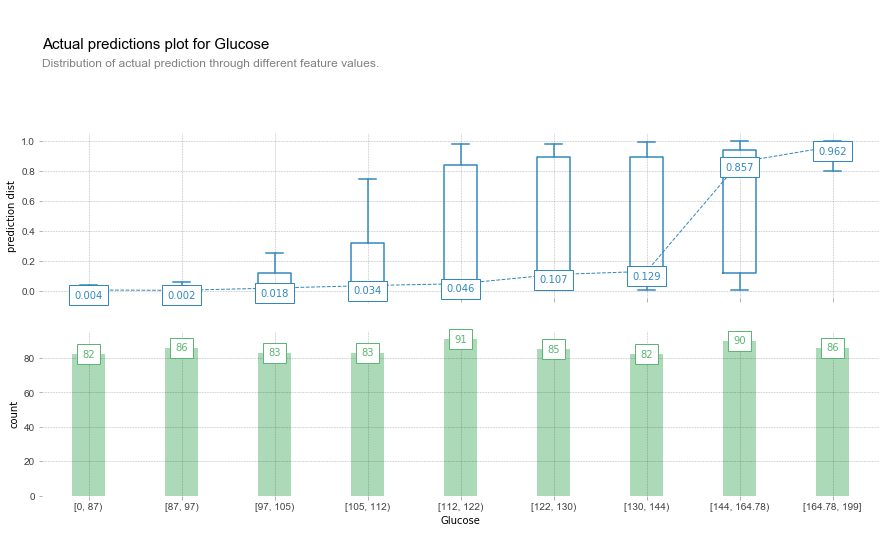

In [39]:
fig,ax,summary_df = info_plots.actual_plot(model = lgbm,
                                          X = df[cols], feature=f'{df.columns[1]}',feature_name=f'{df.columns[1].capitalize()}',
                                          predict_kwds={})

- 특정 구간의 피처가 당뇨병 진당네 얼마나 영향력을 행사하는가를 시각적으로 표현


In [42]:
from pdpbox import *

In [44]:
pdp_gc = pdp.pdp_isolate(model=xgb,
                        dataset=df,
                        model_features=cols,
                        feature='glucose')

- pdp.pdp_isloate는 glucose 피처 하나에 대해 부분 의존성 수치를 계산

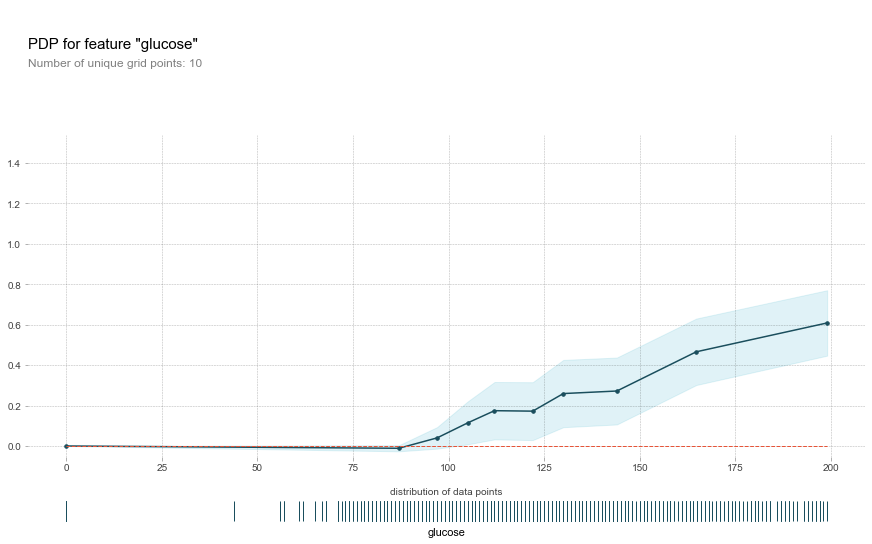

In [51]:
fig,ax = pdp.pdp_plot(pdp_gc,
                     'glucose', plot_lines=False,
                     frac_to_plot=.5,
                     plot_pts_dist=True)

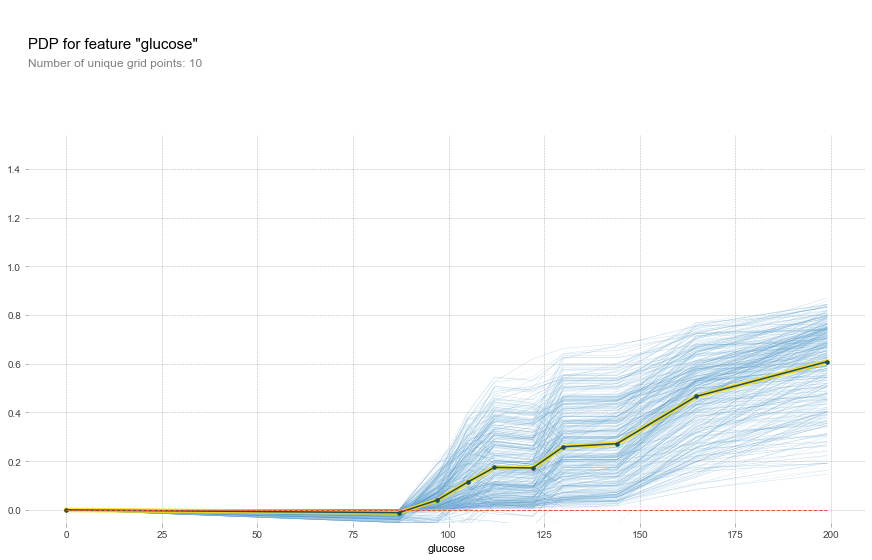

In [53]:
fig,ax = pdp.pdp_plot(pdp_gc,
                     'glucose', plot_lines=True,
                     frac_to_plot=.5,
                     plot_pts_dist=False)

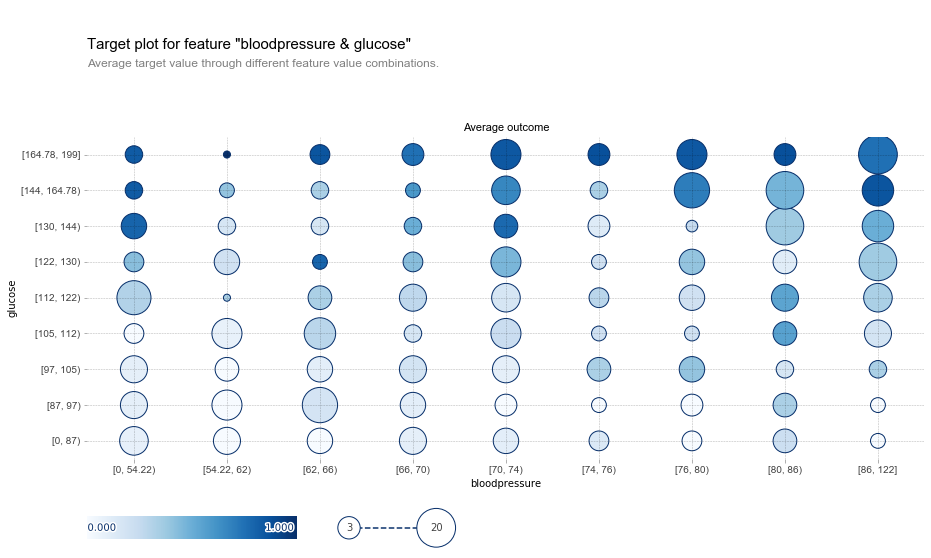

In [54]:
fig,ax,summary_df = info_plots.target_plot_interact(df= df,
                                                   feature_names=['bloodpressure','glucose'],
                                                   features=['bloodpressure','glucose'],
                                                   target = target)

- 원의 크기 : 사례
- 색 : 당뇨병 진단 가능성

In [56]:
pdp_interaction = pdp.pdp_interact(model = xgb,
                dataset=df,
                model_features=cols,
                features=['bloodpressure','glucose'])

- pdp_interact는 부분 의존성 계산

C:\Users\qhadk\AppData\Local\Continuum\anaconda3\lib\site-packages\pdpbox\pdp_plot_utils.py:249: UserWarning: The following kwargs were not used by contour: 'N'
  c1 = inter_ax.contourf(X, Y, pdp_mx, N=level, origin='lower', cmap=cmap, norm=norm, alpha=inter_fill_alpha)


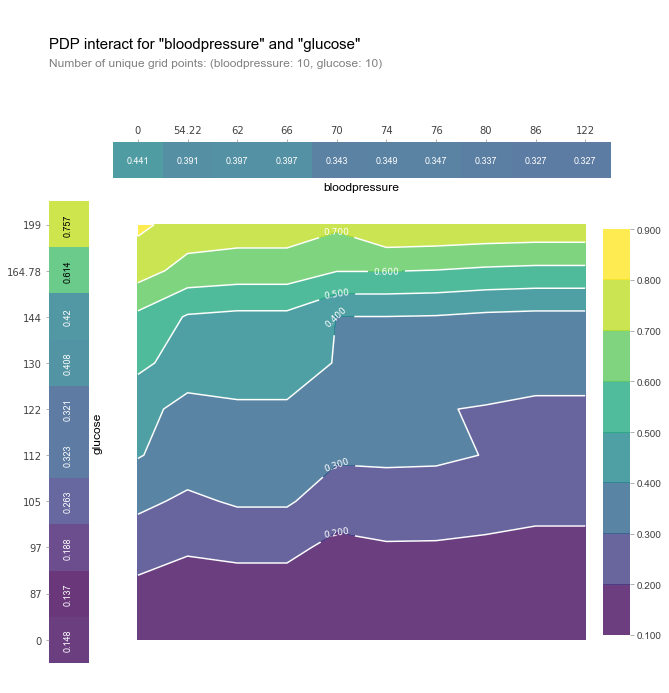

In [66]:
fig,ax = pdp.pdp_interact_plot(pdp_interact_out=pdp_interaction,feature_names=['bloodpressure','glucose'],
                              plot_type='contour',x_quantile=True,
                              plot_pdp=True)

In [70]:
blood_isloate = pdp.pdp_isolate(model=xgb,
               dataset=df,
               model_features=cols,
               feature=f'{df.columns[2]}')

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23cb37c9788>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23cb37ffb88>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x23cb3bd9b88>}})

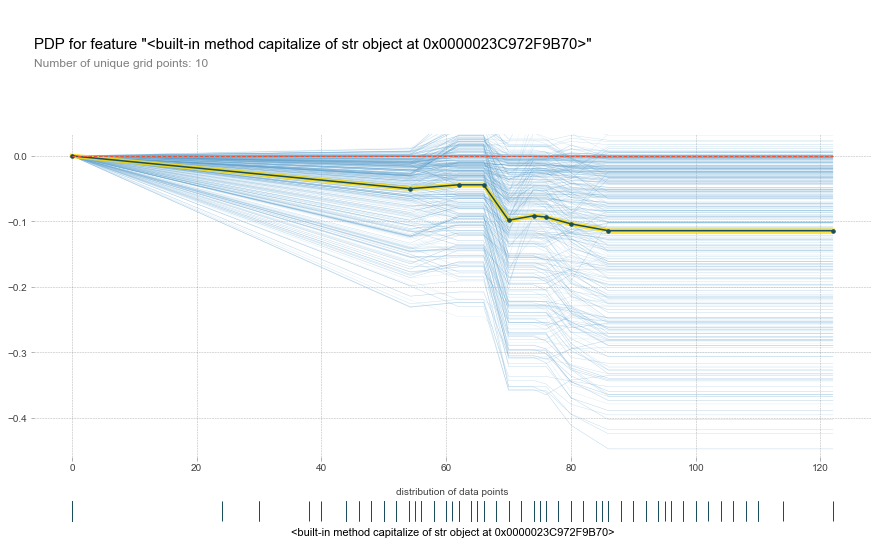

In [72]:
pdp.pdp_plot(blood_isloate,feature_name=f'{df.columns[2].capitalize}',
            plot_pts_dist=True, plot_lines=True,
            frac_to_plot=.5)

- 모델은 혈압이 측정될 때마다 당뇨병 진다에 음의 영향력 발휘

### LOFO(Leave Out Feature Out)

- 피처들 중 하나씩 제거하고 기본 모델에 대해 파라미터 점수를 체크한다


**LOFO의 장점**

- 1. 성능을 저해하는 피처들의 부정적 중요성도 체크한다.
- 2. 테스트 셋에서도 일반화하기 쉽다.
- 3. 변수들 그룹화 가능, 특히 tfidf나 원핫인코딩과 같은 고차원 변수에 유용
- 4. 중요성을 과소평가하는 것을 피하기 위해 매우 상관성이 높은 변수들을 자동적으로 그룹화한다.

In [75]:
from lofo import LOFOImportance, Dataset, plot_importance

In [79]:
dataset = Dataset(df = df, target='outcome',features=cols)

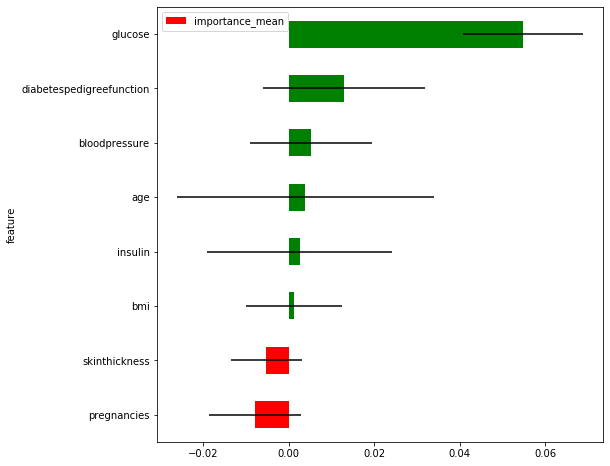

In [87]:
lofo_imp = LOFOImportance(dataset,model=xgb,scoring='accuracy')

importance_df = lofo_imp.get_importance()

plot_importance(importance_df,figsize=(8,8))

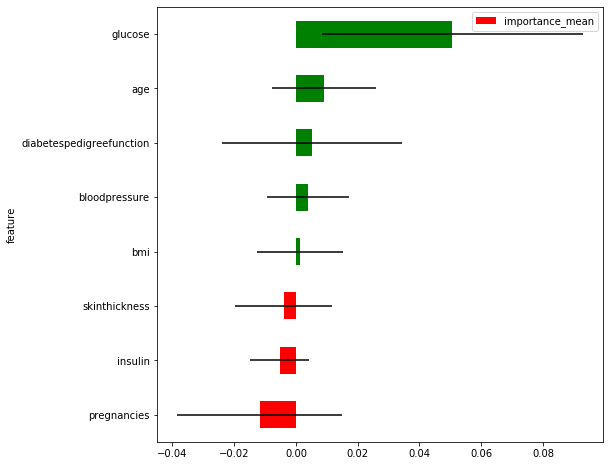

In [112]:
lofo_imp = LOFOImportance(dataset,model=lgbm,scoring='accuracy')

importance_df = lofo_imp.get_importance()

plot_importance(importance_df,figsize=(8,8))

In [89]:
kfold = KFold(n_splits=5,shuffle=True, random_state=42)

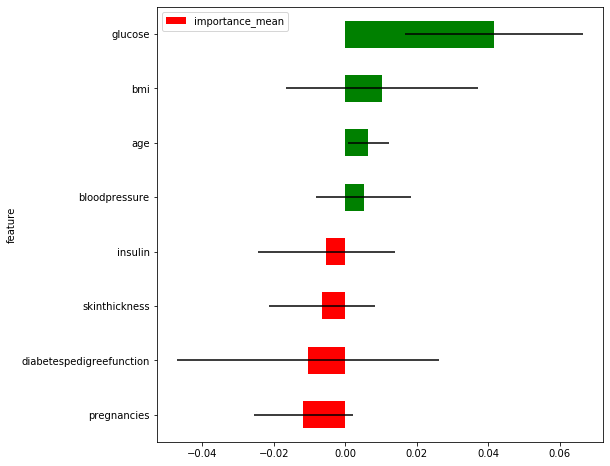

In [114]:
lofo_imp = LOFOImportance(dataset,model=xgb,scoring='accuracy',cv=kfold)

importance_df = lofo_imp.get_importance()

plot_importance(importance_df,figsize=(8,8))

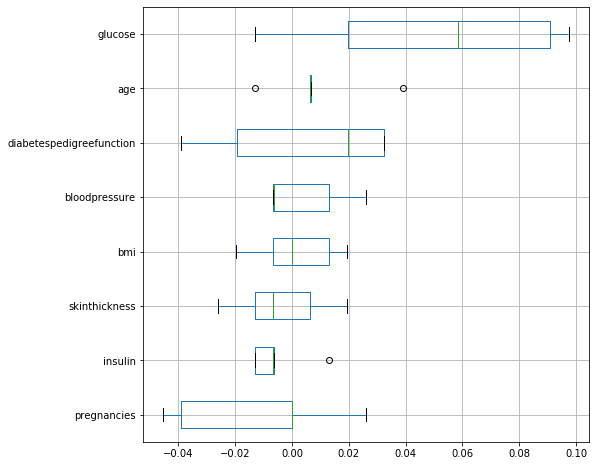

In [115]:
lofo_imp = LOFOImportance(dataset,model=lgbm,scoring='accuracy',cv=kfold)

importance_df = lofo_imp.get_importance()

plot_importance(importance_df,figsize=(8,8),kind='box')

- Flofo Importance라는 것이 있는데 이건 lofo가 시간이 너무 오래걸릴 때 사용 (데이터가 1000개 이상일 경우 사용가능)

### Optuna로 파라미터 튜닝하기

#### Optuna

- 하이퍼파라미터 튜닝에 쓰고 있는 기법
- 빠르게 튜닝 가능
- 튜닝 방식 지정
- 다른 라이브러리에 비해 직관적인 장점

### 파리미터

- suggest_int : 범위 내의 정수형 값 선택
- suggest_categorical : List 내의 데이터 중 선택
- suggest_uniform : 범위 내의 균일 분포 값 선택
- suggest_discrete_uniform : 범위 내의 이산 균등 분포 값 선택
- suggest_loguniform : 범위 내의 로그 함수 선상의 값을 선택

In [28]:
from optuna import Trial
from optuna.samplers import TPESampler
from optuna.integration import SkoptSampler

import numpy as np
y = np.array(y).reshape(768)

In [67]:
def objectiveXGB(trial : Trial, X,y,n) :
    param = {'random_state' : 42,
            'max_depth' : trial.suggest_int('max_depth', 3, 16),
            'n_estimators' : trial.suggest_int('n_estimators', 1000, 10000,1000),
            'learning_rate' : trial.suggest_float('learning_rate',0.01,0.1),
            'min_child_weight' : trial.suggest_int('min_child_weight', 1, 300),
        'gamma' : trial.suggest_int('gamma', 1, 3)}
    
    model = XGBClassifier(**param)
    xgb_model = model.fit(X,y,verbose=True)
    
    kfold = KFold(n_splits=n,shuffle=True, random_state=42)
    accuracy_list = []
    for tr_idx,val_idx in kfold.split(X,y) :
        X_tr,X_val,y_tr,y_val = X.iloc[tr_idx],X.iloc[val_idx], y[tr_idx],y[val_idx]
        xgb_model.fit(X_tr,y_tr)
        pred = xgb_model.predict(X_val)
        accuracy = accuracy_score(y_val,pred)
        accuracy_list.append(accuracy)
    
    return np.mean(accuracy_list)

In [68]:
tpe = TPESampler(seed=42)

study = optuna.create_study(direction='maximize',sampler=tpe)

[I 2022-03-16 13:21:28,003] A new study created in memory with name: no-name-7121197d-4332-4ebd-b608-86b0d83bf0c8


In [48]:
study.optimize(lambda trial : objectiveXGB(trial,X,y),n_trials=10)

[I 2022-03-16 11:26:29,361] Trial 9 finished with value: 0.6038961038961039 and parameters: {'max_depth': 12, 'n_estimators': 4000, 'learning_rate': 0.05680612190600298, 'min_child_weight': 165, 'gamma': 1}. Best is trial 2 with value: 0.7467532467532467.
[I 2022-03-16 11:26:32,617] Trial 10 finished with value: 0.6298701298701299 and parameters: {'max_depth': 16, 'n_estimators': 8000, 'learning_rate': 0.09455490474077703, 'min_child_weight': 269, 'gamma': 2}. Best is trial 2 with value: 0.7467532467532467.
[I 2022-03-16 11:26:37,845] Trial 11 finished with value: 0.8441558441558441 and parameters: {'max_depth': 3, 'n_estimators': 8000, 'learning_rate': 0.07390133717911358, 'min_child_weight': 9, 'gamma': 1}. Best is trial 11 with value: 0.8441558441558441.
[I 2022-03-16 11:26:43,103] Trial 12 finished with value: 0.8571428571428571 and parameters: {'max_depth': 3, 'n_estimators': 8000, 'learning_rate': 0.07958341500679109, 'min_child_weight': 12, 'gamma': 1}. Best is trial 12 with val

In [49]:
print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

Best trial : score 0.9675324675324676, 
params {'max_depth': 7, 'n_estimators': 8000, 'learning_rate': 0.07158157717736771, 'min_child_weight': 2, 'gamma': 2}


#### 파라미터 중요도 확인 그래프

In [51]:
optuna.visualization.plot_param_importances(study)

#### 최적화 과정 시각화

In [50]:
optuna.visualization.plot_optimization_history(study) 

### Kfold

In [69]:
tpe = TPESampler(seed=42)

study = optuna.create_study(direction='maximize',sampler=tpe)

[I 2022-03-16 13:21:44,652] A new study created in memory with name: no-name-3f3d01d3-ebb2-4713-9f51-3036c2906874


In [70]:
study.optimize(lambda trial : objectiveXGB(trial,X,y,5),n_trials=10)

[I 2022-03-16 13:22:23,019] Trial 0 finished with value: 0.6510567863509039 and parameters: {'max_depth': 8, 'n_estimators': 10000, 'learning_rate': 0.07587945476302646, 'min_child_weight': 180, 'gamma': 1}. Best is trial 0 with value: 0.6510567863509039.
[I 2022-03-16 13:22:24,972] Trial 1 finished with value: 0.6510567863509039 and parameters: {'max_depth': 5, 'n_estimators': 1000, 'learning_rate': 0.08795585311974417, 'min_child_weight': 181, 'gamma': 3}. Best is trial 0 with value: 0.6510567863509039.
[I 2022-03-16 13:22:45,316] Trial 2 finished with value: 0.7291401409048468 and parameters: {'max_depth': 3, 'n_estimators': 10000, 'learning_rate': 0.08491983767203796, 'min_child_weight': 64, 'gamma': 1}. Best is trial 2 with value: 0.7291401409048468.
[I 2022-03-16 13:22:53,209] Trial 3 finished with value: 0.6510567863509039 and parameters: {'max_depth': 5, 'n_estimators': 4000, 'learning_rate': 0.05722807884690141, 'min_child_weight': 130, 'gamma': 1}. Best is trial 2 with value:

In [71]:
print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

Best trial : score 0.7291401409048468, 
params {'max_depth': 3, 'n_estimators': 10000, 'learning_rate': 0.08491983767203796, 'min_child_weight': 64, 'gamma': 1}


In [72]:
optuna.visualization.plot_param_importances(study)

In [73]:
optuna.visualization.plot_optimization_history(study)